Project Name: Analysis of an influence campaign of Sissy Mua

Date: 4 September 2020 
Budget: 30.000 € 
Objective of Campaign: To recruit new Generation Z customers from social networks. 
Aim of Analysis: 
A)The team in charge of this influence campaign wants to know if the objective of rejuvenating its target population has been achieved. 
B)If this campaign was profitable for Decathlon. 

Conclusion

In general Gen-Z customers did more shopping but bought less quantity of products. The increase in number of Gen-Z customers was not related to campaign, mostly existing Gen-Z customers were effected from the campaign. Eventhough visits to website increaed it was the existing Gen-Z customers who did the shopping. 

Sales by quantity were decreased in both Gen-Z and general audience. In a time like this the campaign created a successful stir in sales numbers. The campaign was overall profitable. 

Details: 

-Gen-Z customers purchases increased 27% compared to before campaign. 
-Eventhough the campaign was able to attrack new Gen-Z customers, the increase was not related to campaign. 
-In digital store, general product reviews and rating stayed the same but unique visitors increased 23%.
-In general sales by quantity of items decreased 4% and for Gen-Z it decreased for 6%.  
-Purchase of campaign products incrased 400x in general audience and 900x in Gen-Z customers.
-When the budget and returned products are removed, the campaign achieved 191,603.80 profit.
-The campaigh had a profitability rate of 86%. 

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Import datasets
business_unit_df = pd.read_csv('d_business_unit.csv')
customers_df = pd.read_csv('d_customers.csv')
sku_df = pd.read_csv('d_sku.csv')
transaction_df = pd.read_csv('f_transaction_detail.csv')
flow_audience_df = pd.read_csv('flow_audience.csv')

Part A: Reaching Gen-Z

A.1) If the sales for Gen-Z increased or not?
A.2) If there had been significant change in number of Gen-Z customers?
A.3) If there had been a significant increase product reviews among general audience? 

Part B: Sales & Profit

B.1) If the sales by quantity in general population increased or not?
B.2) If the sales of the campaign products increased or not? 
B.2) Measuring Profitability of Campaing

## Part A: Reaching Gen-Z

#### A.1)If the sales for Gen-Z increased or not?
##### Yes, the sales person for Gen-Z customers increased 27.14% and the difference between before and after was statistically significant. 


In [ ]:
# In order to find a significant change in number of gen-Z customers I'll use customers_df.

In [6]:
customers_df.head()

,loyalty_card_num,year_birthdate,gender_id,language_id,email_is_valid,mobile_is_valid,loyalty_card_creation_date,but_idr_business_unit_usual,but_idr_business_unit_creator,cnt_country_code_creator,optin_sport,optin_review,optin_event,last_purchase_date
0,879697295889595,1972.0,2.0,FR,True,True,2013-11-28 12:27:00,33640,33640,FR,1,1,1,2021-02-28
1,333860358022185,1978.0,1.0,FR,True,True,2009-01-13 20:04:00,33785,33962,GP,0,0,0,2021-02-06
2,61079233998189,NaN,2.0,FR,True,True,2020-09-04 08:25:32,34207,261725,FR,0,0,0,2020-10-07
3,842643644772525,1974.0,2.0,FR,True,True,2008-02-14 00:00:00,33624,33624,FR,1,1,1,2020-10-09
4,606624348967155,NaN,2.0,FR,True,True,2019-07-31 16:12:46,33767,33767,FR,0,0,0,2020-09-05


In [10]:
# Number of row
customers_df.shape[0]

425151

In [8]:
customers_df.isnull().sum()

loyalty_card_num                      0
year_birthdate                    90364
gender_id                          6541
language_id                           0
email_is_valid                     3949
mobile_is_valid                  112552
loyalty_card_creation_date         1727
but_idr_business_unit_usual           0
but_idr_business_unit_creator         0
cnt_country_code_creator              0
optin_sport                           0
optin_review                          0
optin_event                           0
last_purchase_date                  596
dtype: int64

In [12]:
# Counting ratio of missing birth year in data
total_people = len(customers_df)
missing_birthdate_count = customers_df['year_birthdate'].isnull().sum()
ratio = missing_birthdate_count / total_people

print("Ratio of people with missing birthdate data:", ratio)

# 21% of people are missing which is a high value. 
# Checking other tables, I can see that I can not find this information or feature engineer to create it. 
# So I'll continue with the rest 79%

Ratio of people with missing birthdate data: 0.2125456602477708


In [25]:
#Removing outliers 

Q1 = customers_df['year_birthdate'].quantile(0.25)
Q3 = customers_df['year_birthdate'].quantile(0.75)
IQR = Q3 - Q1

cust_filtered_df = customers_df[(customers_df['year_birthdate'] >= Q1 - 1.5 * IQR) & (customers_df['year_birthdate'] <= Q3 + 1.5 * IQR)]


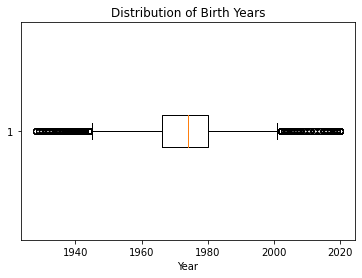

In [26]:
import matplotlib.pyplot as plt

cust_filter_df = customers_df[(customers_df['year_birthdate'] >= 1928) & (customers_df['year_birthdate'] <= 2020)]

plt.boxplot(filter_df['year_birthdate'], vert=False)
plt.xlabel('Year')
plt.title('Distribution of Birth Years')
plt.show()


In [27]:
cust_filtered_df.shape[0]/customers_df.shape[0]
# All the null values and outliers are gone. 
# Still have 77.5% of the data

0.7753386443875235

In [31]:
cust_filtered_df['birthdate'] = pd.to_datetime(cust_filtered_df['year_birthdate'], format='%Y')

generation_labels = ['Silent Generation', 'Baby Boomers', 'Gen X', 'Millennials',
                     'Gen Z']
generation_bins = [pd.to_datetime('1928-01-01'), pd.to_datetime('1946-12-31'),
                   pd.to_datetime('1964-12-31'), pd.to_datetime('1976-12-31'),
                   pd.to_datetime('1995-12-31'), pd.to_datetime('2010-12-31')]

cust_filtered_df['generation'] = pd.cut(cust_filtered_df['birthdate'], bins=generation_bins,
                                   labels=generation_labels)

cust_filtered_df.head()

        loyalty_card_num  year_birthdate  gender_id language_id  \
0        879697295889595          1972.0        2.0          FR   
1        333860358022185          1978.0        1.0          FR   
3        842643644772525          1974.0        2.0          FR   
5        240662730725066          1962.0        2.0          FR   
8        538776645520172          1968.0        2.0          FR   
...                  ...             ...        ...         ...   
425145   365846522347713          1962.0        2.0          FR   
425146   483448475276972          1977.0        1.0          FR   
425148   313203965827419          1975.0        2.0          FR   
425149   813966149742906          1969.0        2.0          FR   
425150   341523393796752          1984.0        2.0          FR   

       email_is_valid mobile_is_valid loyalty_card_creation_date  \
0                True            True        2013-11-28 12:27:00   
1                True            True        2009-01-13 20:

<ipython-input-31-65ab92deafe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_filtered_df['birthdate'] = pd.to_datetime(cust_filtered_df['year_birthdate'], format='%Y')
<ipython-input-31-65ab92deafe5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_filtered_df['generation'] = pd.cut(cust_filtered_df['birthdate'], bins=generation_bins,


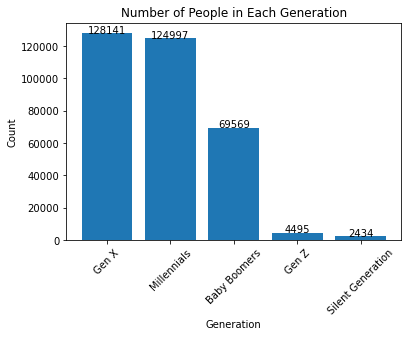

In [32]:
generation_counts = cust_filtered_df['generation'].value_counts()

plt.bar(generation_counts.index, generation_counts.values)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Number of People in Each Generation')
plt.xticks(rotation=45)

# Add text annotations for count numbers
for i, count in enumerate(generation_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.show()


In [38]:
# Now I'll seperate Gen-Z and create 2 new frames. 
# Frame Before: Who has done last shopping 1 week before the campaing
# Frame After: Who has done last shopping 1 week after the campaing

gen_z_df = cust_filtered_df[cust_filtered_df['generation'] == 'Gen Z']

# Convert "last_purchase_date" column to datetime
gen_z_df['last_purchase_date'] = pd.to_datetime(gen_z_df['last_purchase_date'], format='%Y-%m-%d')

# Filter rows for "before_campaign" DataFrame
before_campaign = gen_z_df[(gen_z_df['last_purchase_date'] >= '2020-08-27') & (gen_z_df['last_purchase_date'] <= '2020-09-03')]

# Filter rows for "after_campaign" DataFrame
after_campaign = gen_z_df[(gen_z_df['last_purchase_date'] >= '2020-09-04') & (gen_z_df['last_purchase_date'] <= '2020-09-10')]

<ipython-input-38-785639cbb5d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_z_df['last_purchase_date'] = pd.to_datetime(gen_z_df['last_purchase_date'], format='%Y-%m-%d')


In [33]:
cust_filtered_df.head()

,loyalty_card_num,year_birthdate,gender_id,language_id,email_is_valid,mobile_is_valid,loyalty_card_creation_date,but_idr_business_unit_usual,but_idr_business_unit_creator,cnt_country_code_creator,optin_sport,optin_review,optin_event,last_purchase_date,birthdate,generation
0,879697295889595,1972.0,2.0,FR,True,True,2013-11-28 12:27:00,33640,33640,FR,1,1,1,2021-02-28,1972-01-01,Gen X
1,333860358022185,1978.0,1.0,FR,True,True,2009-01-13 20:04:00,33785,33962,GP,0,0,0,2021-02-06,1978-01-01,Millennials
3,842643644772525,1974.0,2.0,FR,True,True,2008-02-14 00:00:00,33624,33624,FR,1,1,1,2020-10-09,1974-01-01,Gen X
5,240662730725066,1962.0,2.0,FR,True,True,2003-03-01 01:53:00,33677,33704,FR,0,0,0,2020-12-05,1962-01-01,Baby Boomers
8,538776645520172,1968.0,2.0,FR,True,True,2004-05-04 01:25:00,33704,33704,FR,0,0,0,2021-02-22,1968-01-01,Gen X


In [47]:
from scipy.stats import mannwhitneyu
# Extract the last_purchase_date for the statistical test
before_data = before_campaign['last_purchase_date']
after_data = after_campaign['last_purchase_date']

#Hypothesis Ho:There is a difference, Ha:There is no difference
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(before_data, after_data, alternative='two-sided')

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)


There is a significant difference between the groups.
Mann-Whitney U statistic: 0.0
P-value: 4.42317878953346e-178


In [44]:
before_count = before_campaign['loyalty_card_num'].nunique()
after_count = after_campaign['loyalty_card_num'].nunique()

# Compare the counts
if after_count > before_count:
    print("The number of last purchase dates increased after the campaign.")
elif after_count < before_count:
    print("The number of last purchase dates decreased after the campaign.")
else:
    print("The number of last purchase dates remained the same after the campaign.")

# Print the counts
print("Number of last purchase dates before the campaign:", before_count)
print("Number of last purchase dates after the campaign:", after_count)

The number of last purchase dates increased after the campaign.
Number of last purchase dates before the campaign: 479
Number of last purchase dates after the campaign: 609


In [48]:
# Calculate the percentage increase
sales_increase_ratio = (after_count - before_count) / before_count * 100

# Print the sales increase ratio
print("Sales Increase Ratio: {:.2f}%".format(sales_increase_ratio))

Sales Increase Ratio: 27.14%


#### A.2) If there had been significant change in number of Gen-Z customers?
##### No, eventhough number of Gen-Z customers increased from 40 to 60, the change was statistically non-significant.  

In [49]:
# Now I'll use loyalty_card_creation_date seperate Gen-Z and create 2 new frames. 
# Frame Before: Who was already a member
# Frame After: Who became a member after campaign 

#gen_z_df = cust_filtered_df[cust_filtered_df['generation'] == 'Gen Z']

#gen_z_df['loyalty_card_creation_date'] = pd.to_datetime(gen_z_df['loyalty_card_creation_date'], format='%Y-%m-%d')

# Create "before_customer" and "after_customer" groups
#before_customer = gen_z_df[gen_z_df['loyalty_card_creation_date'] <= '2020-09-03']
#after_customer = gen_z_df[gen_z_df['loyalty_card_creation_date'] >= '2020-09-04']

<ipython-input-49-05593171a7c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_z_df['loyalty_card_creation_date'] = pd.to_datetime(gen_z_df['loyalty_card_creation_date'], format='%Y-%m-%d')


In [54]:
print("Number of people before the campaign:", before_customer.shape[0])
print("Number of people after the campaign:", after_customer.shape[0])
# before custome ris 4318 and after is 86. before group contains a longer data interval. 
# So I'll limit everything to last one week before and after 

Number of people before the campaign: 4318
Number of people after the campaign: 86


In [59]:
# Convert "loyalty_card_creation_date" column to datetime
gen_z_df['loyalty_card_creation_date'] = pd.to_datetime(gen_z_df['loyalty_card_creation_date'], format='%Y-%m-%d')

# Create "before_customer" and "after_customer" groups
before_loyal_customer = gen_z_df[(gen_z_df['loyalty_card_creation_date'] >= '2020-08-27') & (gen_z_df['loyalty_card_creation_date'] <= '2020-09-03')]
after_loyal_customer = gen_z_df[(gen_z_df['loyalty_card_creation_date'] >= '2020-09-04') & (gen_z_df['loyalty_card_creation_date'] <= '2020-09-10')]


<ipython-input-59-74d0df3e832b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_z_df['loyalty_card_creation_date'] = pd.to_datetime(gen_z_df['loyalty_card_creation_date'], format='%Y-%m-%d')


In [60]:
print("Number of people before the campaign:", before_loyal_customer.shape[0])
print("Number of people after the campaign:", after_loyal_customer.shape[0])

# groups are more balanced now. So we can do the analysis. 

Number of people before the campaign: 40
Number of people after the campaign: 60


In [62]:
from scipy.stats import chi2_contingency

# Get the counts of customers in each group
before_loyal_customer = before_loyal_customer.shape[0]
after_loyal_customer = after_loyal_customer.shape[0]

# Create a contingency table
contingency_table = [[before_loyal_customer, after_loyal_customer]]

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the number of customers between the groups.")
else:
    print("There is no significant difference in the number of customers between the groups.")

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


There is no significant difference in the number of customers between the groups.
Chi-square statistic: 0.0
P-value: 1.0


#### A.3) If there had been a significant increase product reviews among general audience? 
#### There has been no significant change in average rating of the product and in number of product reviews. However number of unique visitors increased 23% in total. 

In [70]:
#For this part of the analysis I'll check three parts. 
#average rating of the product
#number of product reviews
#number of unique visitors

In [71]:
flow_audience_df.head()

,hit_date,url_referer_host,product_id_model,product_instock,device_type,avg_note,nb_reviews,tot_visitors
0,2020-08-27,www.decathlon.fr,2859688.0,available,mobile,4.46,112.0,21
1,2020-08-25,www.decathlon.fr,7054974.0,available,tablet,4.44,1418.0,1
2,2020-09-03,www.decathlon.fr,5920332.0,available,mobile,4.59,113.0,14
3,2020-09-06,www.decathlon.fr,5324312.0,available,desktop,4.54,507.0,9
4,2020-08-29,www.decathlon.fr,8500019.0,partially,mobile,4.48,113.0,15


In [73]:
#Number of rows
print("Number of rows:",flow_audience_df.shape[0])

#Number of columns
print("Number of columns:",flow_audience_df.shape[1])

Number of rows: 51536
Number of columns: 8


In [74]:
# Convert "hit_date" column to datetime type
flow_audience_df['hit_date'] = pd.to_datetime(flow_audience_df['hit_date'])

# Define the before and after date ranges
before_start_date = pd.to_datetime('2020-08-27')
before_end_date = pd.to_datetime('2020-09-03')
after_start_date = pd.to_datetime('2020-09-04')
after_end_date = pd.to_datetime('2020-09-10')

# Filter the dataframe for the "before" dates
before_df = flow_audience_df[(flow_audience_df['hit_date'] >= before_start_date) & (flow_audience_df['hit_date'] <= before_end_date)]

# Filter the dataframe for the "after" dates
after_df = flow_audience_df[(flow_audience_df['hit_date'] >= after_start_date) & (flow_audience_df['hit_date'] <= after_end_date)]


In [76]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for avg_note
statistic, p_value = mannwhitneyu(before_df['avg_note'], after_df['avg_note'], alternative='two-sided')

# Set the significance level
alpha = 0.05

# Check the significance
if p_value < alpha:
    print("There is a significant difference in the values of avg_note between the groups.")
else:
    print("There is no significant difference in the values of avg_note between the groups.")

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)


There is no significant difference in the values of avg_note between the groups.
Mann-Whitney U statistic: 168575072.0
P-value: 0.8145404857058924


In [77]:
# Perform Mann-Whitney U test for avg_note
statistic, p_value = mannwhitneyu(before_df['nb_reviews'], after_df['nb_reviews'], alternative='two-sided')

# Set the significance level
alpha = 0.05

# Check the significance
if p_value < alpha:
    print("There is a significant difference in the values of nb_reviews between the groups.")
else:
    print("There is no significant difference in the values of nb_reviews between the groups.")

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

There is no significant difference in the values of nb_reviews between the groups.
Mann-Whitney U statistic: 169133546.5
P-value: 0.432802973534397


In [78]:
# Perform Mann-Whitney U test for avg_note
statistic, p_value = mannwhitneyu(before_df['tot_visitors'], after_df['tot_visitors'], alternative='two-sided')

# Set the significance level
alpha = 0.05

# Check the significance
if p_value < alpha:
    print("There is a significant difference in the values of tot_visitors between the groups.")
else:
    print("There is no significant difference in the values of tot_visitors between the groups.")

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

There is a significant difference in the values of tot_visitors between the groups.
Mann-Whitney U statistic: 166118705.5
P-value: 0.027682998874315645


In [79]:
# Calculate the mean of avg_note in before_df
mean_before = before_df['tot_visitors'].mean()

# Calculate the mean of avg_note in after_df
mean_after = after_df['tot_visitors'].mean()

# Calculate the relative change as a ratio
relative_change = (mean_after - mean_before) / mean_before

# Convert the relative change to a percentage
percentage_change = relative_change * 100

# Print the percentage change
print("The tot_visitors increased by:", percentage_change, "%")


The tot_visitors increased by: 22.92691360844044 %


## Part B: Sales & Profit

#### B.1) If the sales by quantity in general population increased or not? 
##### For all customer groups sales has changed significantly, decreasing 4%
##### For Gen-Z sales has changed significantly, decreasing 6%

In [85]:
# For this part of the analysis I'll use transaction data in dividing it into two again as before and after. 
transaction_df.head()

,the_transaction_id,tdt_date_to_returned,the_date_transaction,the_date_authorized,sku_idr_sku,but_idr_business_unit,ctm_customer_id,ctm_zip_code,the_to_type,the_transaction_status,tdt_type_detail,f_to_tax_in,f_qty_item
0,7-214-214-20200827180547-5-3116,NaN,2020-08-27 18:05:47,2020-08-27 18:05:47,7218584,33780,NaN,38,offline,finished,sale,20.0,1
1,7-62-62-20200827180621-9-5947,NaN,2020-08-27 18:06:21,2020-08-27 18:06:21,7218097,33640,NaN,NaN,offline,finished,sale,5.0,1
2,7-553-553-20200827180631-7-3156,NaN,2020-08-27 18:06:31,2020-08-27 18:06:31,7394559,34110,NaN,NaN,offline,finished,sale,70.0,1
3,7-276-276-20200827180648-7-6711,NaN,2020-08-27 18:06:48,2020-08-27 18:06:48,2137874,33839,4.367465e+14,NaN,offline,finished,sale,23.0,1
4,7-189-189-20200827180710-36-276,NaN,2020-08-27 18:07:10,2020-08-27 18:07:10,516174,33758,NaN,75,offline,finished,sale,5.0,1


In [86]:
#Drop the_date_authorized, ctm_zip_code for pocessing power. 
transactions_df = transaction_df

# Drop the 'the_date_authorized' and 'ctm_zip_code' columns permanently
transactions_df.drop(['the_date_authorized', 'ctm_zip_code'], axis=1, inplace=True)

In [87]:
# Transform the_date_transaction. 
# Convert 'the_date_transaction' column to datetime data type
transactions_df['the_date_transaction'] = pd.to_datetime(transactions_df['the_date_transaction'])

# Extract only the date part and overwrite the column
transactions_df['the_date_transaction'] = transactions_df['the_date_transaction'].dt.date

In [89]:
# Change tdt_date_to_returned to returned or not. 
# Replace NaN values with "kept" and non-NaN values with "returned" in 'tdt_date_to_returned' column
transactions_df['tdt_date_to_returned'].fillna('kept', inplace=True)
transactions_df['tdt_date_to_returned'] = transactions_df['tdt_date_to_returned'].replace({pd.NaT: 'returned'})

In [90]:
transactions_df.head()

,the_transaction_id,tdt_date_to_returned,the_date_transaction,sku_idr_sku,but_idr_business_unit,ctm_customer_id,the_to_type,the_transaction_status,tdt_type_detail,f_to_tax_in,f_qty_item
0,7-214-214-20200827180547-5-3116,kept,2020-08-27,7218584,33780,NaN,offline,finished,sale,20.0,1
1,7-62-62-20200827180621-9-5947,kept,2020-08-27,7218097,33640,NaN,offline,finished,sale,5.0,1
2,7-553-553-20200827180631-7-3156,kept,2020-08-27,7394559,34110,NaN,offline,finished,sale,70.0,1
3,7-276-276-20200827180648-7-6711,kept,2020-08-27,2137874,33839,4.367465e+14,offline,finished,sale,23.0,1
4,7-189-189-20200827180710-36-276,kept,2020-08-27,516174,33758,NaN,offline,finished,sale,5.0,1


In [91]:
# Check all the sales between before and after dates
# Create the 'before_df' dataframe with dates between 27 August 2020 and 3 September 2020
before_start_date = pd.to_datetime('2020-08-27')
before_end_date = pd.to_datetime('2020-09-03')
before_df = transactions_df[(transactions_df['the_date_transaction'] >= before_start_date) & (transactions_df['the_date_transaction'] <= before_end_date)]

# Create the 'after_df' dataframe with dates between 4 September 2020 and 10 September 2020
after_start_date = pd.to_datetime('2020-09-04')
after_end_date = pd.to_datetime('2020-09-10')
after_df = transactions_df[(transactions_df['the_date_transaction'] >= after_start_date) & (transactions_df['the_date_transaction'] <= after_end_date)]

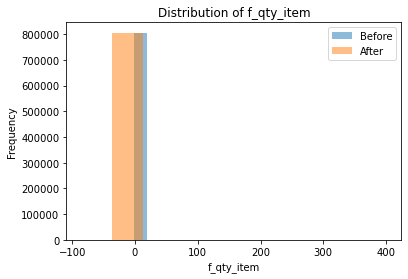

In [94]:
import matplotlib.pyplot as plt

# Plot the histograms for 'before_df' and 'after_df'
plt.hist(before_df['f_qty_item'], bins=10, alpha=0.5, label='Before')
plt.hist(after_df['f_qty_item'], bins=10, alpha=0.5, label='After')
plt.xlabel('f_qty_item')
plt.ylabel('Frequency')
plt.title('Distribution of f_qty_item')
plt.legend()
plt.show()


In [95]:
from scipy.stats import shapiro

# Assuming data is your array or list of values
stat, p_value = shapiro(before_df['f_qty_item'])

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

The data does not follow a normal distribution.


C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [96]:
# Assuming data is your array or list of values
stat, p_value = shapiro(after_df['f_qty_item'])

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

The data does not follow a normal distribution.


In [97]:
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(before_df['f_qty_item'], after_df['f_qty_item'], alternative='two-sided')

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

There is a significant difference between the groups.
Mann-Whitney U statistic: 325569295425.0
P-value: 2.876987785265308e-20


In [98]:
# Calculate the mean of avg_note in before_df
mean_before = before_df['f_qty_item'].mean()

# Calculate the mean of avg_note in after_df
mean_after = after_df['f_qty_item'].mean()

# Calculate the relative change as a ratio
relative_change = (mean_after - mean_before) / mean_before

# Convert the relative change to a percentage
percentage_change = relative_change * 100

# Print the percentage change
print("The quantity of item bought increased by:", percentage_change, "%")

The quantity of item bought increased by: -0.4786741298897901 %


In [105]:
# Merge transaction data and customer data together to have just Gen-Z customers
merged_before_df = before_df.merge(cust_filtered_df, left_on='ctm_customer_id', right_on='loyalty_card_num', how='inner')
merged_after_df = after_df.merge(cust_filtered_df, left_on='ctm_customer_id', right_on='loyalty_card_num', how='inner')

In [108]:
merged_before_genz_df = merged_before_df[merged_before_df['generation'] == 'Gen Z']
merged_after_genz_df = merged_after_df[merged_after_df['generation'] == 'Gen Z']

In [111]:
print("Number of Gen-Z people before the campaign:", merged_before_genz_df.shape[0])
print("Number of Gen-Z people after the campaign:", merged_after_genz_df.shape[0])

Number of Gen-Z people before the campaign: 3658
Number of Gen-Z people after the campaign: 4006


In [113]:
# Assuming data is your array or list of values
stat, p_value = shapiro(merged_before_genz_df['f_qty_item'])

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The before data does not follow a normal distribution.")
else:
    print("The before data follows a normal distribution.")
    
# Assuming data is your array or list of values
stat, p_value = shapiro(merged_after_genz_df['f_qty_item'])

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("The after data does not follow a normal distribution.")
else:
    print("The after data follows a normal distribution.")

The before data does not follow a normal distribution.
The after data does not follow a normal distribution.


In [114]:
# Extract the 'f_qty_item' data for the two timelines
before_data = merged_before_genz_df['f_qty_item']
after_data = merged_after_genz_df['f_qty_item']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(before_data, after_data, alternative='two-sided')

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in sales between the two timelines.")
else:
    print("There is no significant difference in sales between the two timelines.")

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

There is a significant difference in sales between the two timelines.
Mann-Whitney U statistic: 7531988.5
P-value: 2.4304237971825156e-06


In [115]:
# Calculate the mean of avg_note in before_df
mean_before = merged_before_genz_df['f_qty_item'].mean()

# Calculate the mean of avg_note in after_df
mean_after = merged_after_genz_df['f_qty_item'].mean()

# Calculate the relative change as a ratio
relative_change = (mean_after - mean_before) / mean_before

# Convert the relative change to a percentage
percentage_change = relative_change * 100

# Print the percentage change
print("The quantity of item bought by Gen-Z increased by:", percentage_change, "%")

The quantity of item bought by Gen-Z increased by: -6.609282504814211 %


B.1) If the sales of the campaign products increased or not?
B.2) Measuring Profitability of Campaing

#### B.2) If the sales of the campaign products increased or not? 
##### General Audience pruchased the campign product 400x more and Gen-Z customers purchased 900x more. 

Model Code: 
7635140 - Thisrt
5015822 - Sport Bra
7166996 - Legging
2486222 - Shoes

In [116]:
merged_before_df.head()

,the_transaction_id,tdt_date_to_returned,the_date_transaction,sku_idr_sku,but_idr_business_unit,ctm_customer_id,the_to_type,the_transaction_status,tdt_type_detail,f_to_tax_in,...,loyalty_card_creation_date,but_idr_business_unit_usual,but_idr_business_unit_creator,cnt_country_code_creator,optin_sport,optin_review,optin_event,last_purchase_date,birthdate,generation
0,7-276-276-20200827180648-7-6711,kept,2020-08-27,2137874,33839,4.367465e+14,offline,finished,sale,23.0,...,2013-12-12 09:18:00,33782,33839,FR,1,1,1,2020-08-27,1973-01-01,Gen X
1,7-724-724-20200827180714-3-3585,kept,2020-08-27,7269857,34278,2.627235e+14,offline,finished,sale,17.0,...,2013-07-03 19:20:00,34278,34278,FR,0,0,0,2021-01-11,1985-01-01,Millennials
2,7-724-724-20200827180714-3-3585,kept,2020-08-27,7345025,34278,2.627235e+14,offline,finished,sale,10.0,...,2013-07-03 19:20:00,34278,34278,FR,0,0,0,2021-01-11,1985-01-01,Millennials
3,7-724-724-20200827180714-3-3585,kept,2020-08-27,7414644,34278,2.627235e+14,offline,finished,sale,15.0,...,2013-07-03 19:20:00,34278,34278,FR,0,0,0,2021-01-11,1985-01-01,Millennials
4,7-724-724-20200827180714-3-3585,kept,2020-08-27,7419334,34278,2.627235e+14,offline,finished,sale,15.0,...,2013-07-03 19:20:00,34278,34278,FR,0,0,0,2021-01-11,1985-01-01,Millennials


In [122]:
# create a column with just product numbers to easify process
mdl_num_df = sku_df[['mdl_num_model_r3', 'sku_idr_sku']].copy()

In [127]:
# Merge product number to eleminate campaign products
merged_before_mdl_num_df = merged_before_df.merge(mdl_num_df, left_on='sku_idr_sku', right_on='sku_idr_sku', how='left')
merged_after_mdl_num_df= merged_after_df.merge(mdl_num_df, left_on='sku_idr_sku', right_on='sku_idr_sku', how='left')

In [133]:
# Create a list of campign products
product_codes = ['7635140', '5015822', '7166996', '2486222']

filtered_before_prod_df = merged_before_mdl_num_df[merged_before_mdl_num_df['mdl_num_model_r3'].isin(product_codes)].copy()
filtered_after_prod_df = merged_after_mdl_num_df[merged_after_mdl_num_df['mdl_num_model_r3'].isin(product_codes)].copy()

print("Number of products sold before the campaign:", filtered_before_prod_df.shape[0])
print("Number of products sold after the campaign:", filtered_after_prod_df.shape[0])

Number of products sold before the campaign: 96
Number of products sold after the campaign: 4433


In [140]:
from scipy.stats import ttest_ind

# Sample sizes are different, don't use Wilkonson's Test, distribution and variance is unknown
# Perform Welch's t-test
t_stat, p_value = ttest_ind(merged_before_mdl_num_df['mdl_num_model_r3'], merged_after_mdl_num_df['mdl_num_model_r3'], equal_var=False)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

# Print the t-statistic and p-value
print("Welch's t-statistic:", t_stat)
print("P-value:", p_value)

There is a significant difference between the groups.
Welch's t-statistic: -14.748488809260264
P-value: 3.2214894733894145e-49


In [145]:
#Calculate increase

before = filtered_before_prod_df.shape[0]
after = filtered_after_prod_df.shape[0]

increase = (after - before) / before * 100
print("The increase in sales:", increase, "%")

The increase in sales: 4517.708333333334 %


In [147]:
# Check it for Gen-Z now

filtered_before_genz_df = filtered_before_prod_df[filtered_before_prod_df['generation'] == 'Gen Z']
filtered_after_genz_df = filtered_after_prod_df[filtered_after_prod_df['generation'] == 'Gen Z']

In [155]:
# Due to unbalanced nature of sample sizes, 8 to 740 statistical tests do not work, 
# However looking at the increase we can say that the campign increase the sales in choosen products. 

before = filtered_before_genz_df['mdl_num_model_r3'].shape[0]
after = filtered_after_genz_df['mdl_num_model_r3'].shape[0]

# Perform Welch's t-test
t_stat, p_value = ttest_ind(before, after, equal_var=False)

# Check the significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

# Print the t-statistic and p-value
print("Welch's t-statistic:", t_stat)
print("P-value:", p_value)

There is no significant difference between the groups.
Welch's t-statistic: nan
P-value: nan


C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [158]:
#Calculate increase

increase = (after - before) / before * 100
print("The increase in sales:", increase, "%")

The increase in sales: 9150.0 %


#### B.3) Profitability of Campaign
##### The profitability of campaigh is 86.5% and the profit is 191,603.80

In [ ]:
# Revenue projection among all customer
# Appoint prices to products 

# 7635140 - Thisrt - 14.90
# 5015822 - Sport Bra - 19.90 
# 7166996 - Legging - 24.90
# 2486222 - Shoes - 49.90

In [172]:
df_transaction = pd.read_csv('f_transaction_detail.csv')

In [174]:
# Convert the_date_transaction column to datetime format
df_transaction['the_date_transaction'] = pd.to_datetime(df_transaction['the_date_transaction'])

# Extract date from the_date_transaction
df_transaction['transaction_date'] = df_transaction['the_date_transaction'].dt.date

# Filter transactions related to the influencer campaign
campaign_date = pd.to_datetime('2020-09-04').date()  # Adjust the date as needed
campaign_transactions = df_transaction[df_transaction['transaction_date'] == campaign_date]

In [179]:
df_sku = pd.read_csv('d_sku.csv')

# Merge the dataframes based on the sku_idr_sku column
merged_df = pd.merge(campaign_transactions, df_sku, on='sku_idr_sku', how='left')

In [181]:
merged_df.columns


Index(['the_transaction_id', 'tdt_date_to_returned', 'the_date_transaction',
       'the_date_authorized', 'sku_idr_sku', 'but_idr_business_unit',
       'ctm_customer_id', 'ctm_zip_code', 'the_to_type',
       'the_transaction_status', 'tdt_type_detail', 'f_to_tax_in',
       'f_qty_item', 'transaction_date', 'mdl_num_model_r3',
       'mdl_blue_product', 'fam_num_family', 'family_label',
       'sdp_num_sub_department', 'sdp_label', 'dpt_num_department',
       'dpt_label', 'unv_num_univers', 'unv_label', 'pnt_num_product_nature',
       'product_nature_label', 'category_label', 'brd_type_brand_libelle',
       'sku_date_end'],
      dtype='object')

In [183]:
# Define the values to filter
filter_values = [7635140, 5015822, 7166996, 2486222]

# Filter the dataframe based on the values
filtered_df = merged_df[merged_df['mdl_num_model_r3'].isin(filter_values)]

In [186]:
# Define the price mapping
price_mapping = {
    'T-SHIRT': 14.90,
    'BRA': 19.90,
    'LEGGINGS': 24.90,
    'SHOES': 49.90
}

# Assign prices based on the product_nature_label column
filtered_df['price'] = filtered_df['product_nature_label'].map(price_mapping)

<ipython-input-186-0b264c352bc9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price'] = filtered_df['product_nature_label'].map(price_mapping)


In [192]:
# Update NaN values in tdt_date_to_returned column with 'kept'
filtered_df['tdt_date_to_returned'].fillna('kept', inplace=True)

# Update non-null values in tdt_date_to_returned column with 'returned'
filtered_df['tdt_date_to_returned'].replace(np.nan, 'returned', inplace=True)

C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [194]:
# Multiply f_qty_item and price to calculate the quantity_price
filtered_df['quantity_price'] = filtered_df['f_qty_item'] * filtered_df['price']

<ipython-input-194-8f0743ddc210>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['quantity_price'] = filtered_df['f_qty_item'] * filtered_df['price']


In [206]:
filtered_df.head()

,the_transaction_id,tdt_date_to_returned,the_date_transaction,the_date_authorized,sku_idr_sku,but_idr_business_unit,ctm_customer_id,ctm_zip_code,the_to_type,the_transaction_status,...,dpt_label,unv_num_univers,unv_label,pnt_num_product_nature,product_nature_label,category_label,brd_type_brand_libelle,sku_date_end,price,quantity_price
328,50-13-13-20200904104818-1-1827775782,kept,2020-09-04 10:48:18,2020-09-04 10:48:23,7463476,262186,8.604535e+14,75,online,finished,...,FITNESS,6,FITNESS CARDIO,25082,BRA,CLOTHING,MP,2999-12-31 23:59:59,19.9,19.9
329,50-13-13-20200904104714-1-1828523434,kept,2020-09-04 10:47:14,2020-09-04 10:48:30,7442821,262186,6.897239e+14,60,online,finished,...,FITNESS,6,FITNESS CARDIO,25126,SHOES,FOOTWEAR,MP,2999-12-31 23:59:59,49.9,49.9
330,50-13-13-20200904104714-1-1828523434,kept,2020-09-04 10:47:14,2020-09-04 10:48:30,7452821,262186,6.897239e+14,60,online,finished,...,FITNESS,6,FITNESS CARDIO,25082,BRA,CLOTHING,MP,2999-12-31 23:59:59,19.9,19.9
332,50-13-13-20200904104853-1-1828045595,kept,2020-09-04 10:48:53,2020-09-04 10:48:58,7463948,262186,3.517404e+14,13,online,finished,...,FITNESS,6,FITNESS CARDIO,25082,BRA,CLOTHING,MP,2999-12-31 23:59:59,19.9,19.9
333,50-13-13-20200904104853-1-1828045595,kept,2020-09-04 10:48:53,2020-09-04 10:48:58,7468857,262186,3.517404e+14,13,online,finished,...,FITNESS,6,FITNESS CARDIO,10170,LEGGINGS,CLOTHING,MP,2999-12-31 23:59:59,24.9,24.9


In [214]:
# Filter the dataframe based on 'tdt_date_to_returned' column value
kept_rows = filtered_df[filtered_df['tdt_date_to_returned'] == 'kept']

# Calculate the sum of 'quantity_price' column for 'kept' rows
sum_quantity_price = kept_rows['quantity_price'].sum()

# Display the sum
print(sum_quantity_price)

221603.79999999996


In [215]:
# Filter the dataframe based on 'tdt_date_to_returned' column value
not_kept_rows = filtered_df[filtered_df['tdt_date_to_returned'] != 'kept']

# Calculate the sum of 'quantity_price' column for rows not 'kept'
sum_quantity_price_not_kept = not_kept_rows['quantity_price'].sum()

# Display the sum
print(sum_quantity_price_not_kept)

-12673.099999999999


In [219]:
budget = 30000

profitability = (sum_quantity_price - budget) / sum_quantity_price * 100
print("The profitability of campaigh is:", profitability, "%")

profit = sum_quantity_price - budget

# Display the profit
print(f"Profit: {profit:.2f}")

The profitability of campaigh is: 86.462326007045 %
Profit: 191603.80
